In [1]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 5.5 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 895 kB 47.0 MB/s 
     |████████████████████████████████| 3.3 MB 32.4 MB/s 
     |████████████████████████████████| 636 kB 39.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Tokenizers

Tokenizer는 NLP pipeline에 핵심!

Tokenizer: text input -> number data

## Word-based

![00](https://user-images.githubusercontent.com/59636424/134798195-653b9700-43ea-4e62-b1ee-f47ec74385a0.PNG)


In [2]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


이러한 tokenizer로 꽤 큰 vocabulary를 만들 수 있다!

vocabulary = corpus에 있는 독립적인 token들의 총 수

**각 단어에 대한 엄청 많은 토큰이 생성된다.**

예시로, dog와 dogs는 유사함을 모르니 다르게 표현될 것이다.

---

어휘에 없는 단어들을 표현하기 위해서 UNK라는 token을 사용한다.

=> 하지만 좋지 않다. 이유는 어휘에 없는 단어를 UNK로 표현하는 것이 합리적인 표현이 아니기 때문이다.

=> **그래서 가능한 적은 수의 단어를 토큰화하려 한다!**



## Character-based

text -> characters(문자) split

    vocabulary가 더 작아진다.

    unknown token이 줄어든다.

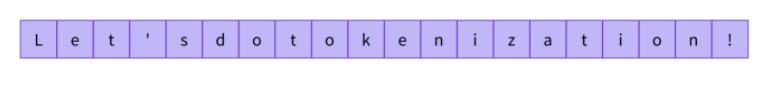

하지만, 이러한 접근법도 완벽하지 않다! -> 단어 그 자체의 의미를 잃는다.

토큰의 양도 많다!

## subword

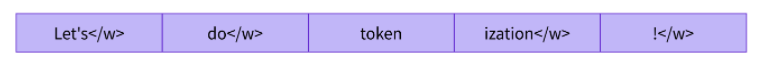

그럼에서 보면, 의미적으로 가지는 두 개의 토큰으로 나눴다. 비교적으로 좋은 coverage를 가지고 unknown token도 거의 없다.

* subword 기술

> * BPE (used in GPT-2)
> * WordPiece (used in BERT)
> * SentencePiece or Unigram (used in several multilingual models)


## Loading and saving

from_pretrained와 save_pretrained method를 이용해 loading과 saving을 한다!

BERT tokenizer loading!

In [3]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

AutoModel과 유사하게, AutoTokenizer class로 checkpoint를 가지고 tokenizer 사용!

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [5]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.save_pretrained("directory_on_my_computer")

## Encoding

text -> number convert!

* 2가지 step 존재!

> *  first step
> > text를 토큰화
> * second step
> > token -> 숫자로 변환 (사전 학습 모델의 vocabulary 사용!)

### Tokenization

In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


subword tokenizer이므로, vocabulary로 나타낼 수 있는 token이 나올 때까지, 단어 분할!!

### From tokens to input IDs

**convert_tokens_to_ids** method로 token -> id로 표현

In [7]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


✏️ Try it out! Replicate the two last steps (tokenization and conversion to input IDs) on the input sentences we used in section 2 (“I’ve been waiting for a HuggingFace course my whole life.” and “I hate this so much!”). Check that you get the same input IDs we got earlier!



In [8]:
sequence = "I’ve been waiting for a HuggingFace course my whole life.” and “I hate this so much!"
tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[146, 787, 1396, 1151, 2613, 1111, 170, 20164, 10932, 2271, 7954, 1736, 1139, 2006, 1297, 119, 790, 1105, 789, 146, 4819, 1142, 1177, 1277, 106]


## Decoding

id -> token으로 표현

In [9]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


decoder method로 index -> token 뿐만 아니라, **문장을 생성하기 위해 동일한 단어의 일부를 token화하여 그룹화**한다!!

=> 이러한 행동은 new text를 예측하는 모델(요약 or 번역)을 사용할 때 유용!